### Problem Statement:

Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

### Understanding the Problem Statement:

In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify how salary is varying with respect to other considerable factors.

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.

In [1]:
import numpy as np # Import numpy library as np
import pandas as pd # Import pandas library as pd
import matplotlib.pyplot as plt # Import matplotlib as plt
import seaborn as sns # Import Seaborn library as sns
import warnings # Import warnings library to remove the warnings while doing the code
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\sairamnaaidu\\Downloads\\New_data_Set.csv") # Read the data set and specify its location by using read.csv

In [3]:
df1 = df.copy() # Copy the originl data set into another one

# Understand the data set - Feature description provided below.

In [4]:
df1 # Print data set df1

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


In [5]:
df1.info() # Print the info about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

Here we have 5000 rows and 19 columns in the data set, some columns are in correct datatype format so we have to convert them

In [6]:
# Here Total Sales in object type we have to convert them into int type
df1["Total_Sales"] = pd.to_numeric(df1["Total_Sales"], errors = 'coerce')

In [7]:
df1.head() # Print the top 5 cells 

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [8]:
df1.tail() # Print the last 5 cells

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,NaN,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,NaN,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,NaN,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,NaN,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,NaN,72,PG


In [9]:
df1.isnull().sum() # Print the null values count in every column

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

In base pay, opening balance, Total Sales columns have 23, 1476, 16 null values respectively

In [10]:
df1.duplicated().sum() # No of duplicated values in the data set

0

In [11]:
df1.describe() # Descriptive statistical analysis of the data set(Numerical Data set)

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,4984.000000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,2272.373977,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,2267.717435,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.800000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,387.350000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.650000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,3744.687500,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,8684.800000,72.00000


In [12]:
df1.describe(include = "object") # Descriptive Analysis of the data set(categorical data)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
count,5000,5000.000000,5000,5000,5000,5000,5000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,4984.000000,5000.00000,5000
unique,2,NaN,2,2,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Male,NaN,No,Yes,Month-to-month,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG
freq,2528,NaN,3524,4539,2777,2956,3682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2979
mean,NaN,0.160000,NaN,NaN,NaN,NaN,NaN,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,2272.373977,32.18480,NaN
std,NaN,0.366643,NaN,NaN,NaN,NaN,NaN,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,2267.717435,24.63673,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.800000,0.00000,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,387.350000,8.00000,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.650000,28.00000,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,3744.687500,55.00000,NaN


In [13]:
df1[df1["Base_pay"].isnull() == True] # Null value cells of base pay column

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
124,Male,0,No,Yes,Month-to-month,No,No,41,49076.09704,NaN,2453.804852,11.940006,2997000,21.510000,16.260000,8.646090,19.40,25.00,2,PG
125,Male,0,Yes,Yes,Two year,No,No,42,49294.09553,NaN,2464.704777,9.280000,14009600,21.900000,15.920000,8.980000,19.40,25.05,2,PG
126,Female,0,No,Yes,One year,Yes,No,42,49346.69135,NaN,2467.334568,37.200001,1736400,21.915001,15.930000,8.997500,19.40,25.10,2,PG
127,Male,0,Yes,Yes,Month-to-month,Yes,Yes,42,49359.76469,NaN,2467.988235,36.860001,2457600,21.917500,16.040001,8.810000,19.40,25.10,2,PG
128,Male,0,Yes,Yes,Two year,Yes,No,42,49372.31057,NaN,2468.615529,37.139999,2994000,22.000000,16.510000,9.050000,19.45,25.15,2,PG
129,Male,0,No,No,Two year,Yes,No,42,49440.90658,NaN,2472.045329,9.280000,12923000,22.020000,16.302500,8.990000,19.45,25.15,2,PG
130,Male,0,Yes,Yes,One year,No,No,42,49492.58316,NaN,2474.629158,9.160000,8951500,22.150000,16.650000,9.000000,19.45,25.20,2,PG
131,Female,0,Yes,Yes,Month-to-month,No,No,42,49513.92593,NaN,2475.696297,37.599998,1442000,22.209999,16.370001,8.987500,19.45,25.20,2,PG
132,Female,0,No,Yes,Month-to-month,Yes,No,42,49522.33256,NaN,2476.116628,9.520000,20174500,22.219999,16.416666,9.090000,19.45,25.25,2,PG
133,Male,0,Yes,Yes,Two year,No,No,42,49599.97686,NaN,2479.998843,37.680000,2887200,22.309999,16.440001,9.040000,19.45,25.25,2,PG


In [14]:
df1[df1["openingbalance"].isnull() == True] # Null value cells of opening balance column

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
3524,Male,0,Yes,Yes,One year,Yes,No,52,113847.8976,45539.15902,5692.394880,47.959999,7213100,NaN,6.170000,47.320000,85.90,3157.00,39,PG
3525,Male,0,Yes,Yes,Two year,No,No,52,113848.5747,45539.42990,5692.428735,48.740002,654600,NaN,7.708571,47.700001,85.90,3161.20,39,PG
3526,Male,0,Yes,Yes,Month-to-month,No,No,52,113854.4403,45541.77611,5692.722015,49.080002,5254900,NaN,8.329860,47.360001,85.95,3161.40,39,PG
3527,Male,0,Yes,Yes,Month-to-month,Yes,Yes,52,113854.8931,45541.95723,5692.744655,49.020000,25266300,NaN,9.371101,47.549999,85.95,3161.60,39,PG
3528,Female,0,Yes,Yes,Two year,Yes,No,52,113861.7597,45544.70389,5693.087985,47.880001,2484200,NaN,8.885000,47.320000,85.95,3162.65,39,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.8000,72278.72000,9034.840000,629.511067,3927000,NaN,293.838840,310.955001,117.80,NaN,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.9000,74274.36000,9284.295000,627.841071,6031900,NaN,301.311314,309.610028,118.60,NaN,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.8000,77054.72000,9631.840000,625.860033,7949400,NaN,306.040009,303.483494,118.60,NaN,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.7000,78388.28000,9798.535000,629.510005,3908400,NaN,308.579987,312.432438,118.65,NaN,72,PG


<AxesSubplot:xlabel='Base_pay', ylabel='Count'>

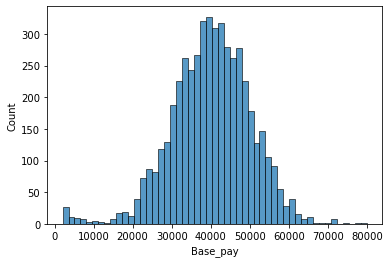

In [15]:
sns.histplot(data = df1, x = "Base_pay") # Histogram of the base pay column

We can say that base pay column follows normal distribution, so mean is the perfect measure to replace the null values in that column

In [16]:
df1["Base_pay"].fillna(df1["Base_pay"].mean(), inplace = True) # Here we repacing the null values with base pay column

In [17]:
df1["Base_pay"].isnull().sum() # After replace the values then the count null count is zero

0

<AxesSubplot:xlabel='openingbalance', ylabel='Count'>

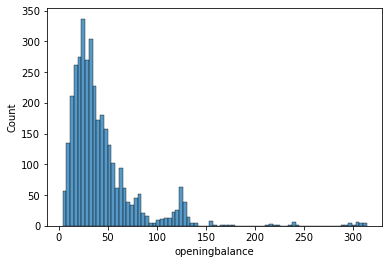

In [18]:
sns.histplot(data = df1, x = "openingbalance") # Histogram of opening blance

Above data is right skewed,so median is the best measure is median to replace the null values

In [19]:
df1["openingbalance"].fillna(df1["openingbalance"].median(), inplace = True) # Replace the null values with median

<AxesSubplot:xlabel='Total_Sales', ylabel='Count'>

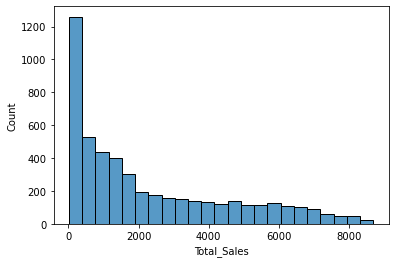

In [20]:
sns.histplot(data = df1, x = "Total_Sales") # Histogram of Total sales

Above data is right skewed,so median is the best measure is median to replace the null values

In [21]:
df1["Total_Sales"].fillna(df1["Total_Sales"].median(), inplace = True) # Replace the null values with median of Total Sales

In [23]:
df1.info()# After handling the null values, tthis is the info of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        5000 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  5000 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     5000 non-null   f

Here i'm dividing the data columns with their respective data types (numerical, categorical) by using for loop

In [24]:
numerical_data = []
categorical_data = []
for i in df1.columns:
    if df1[i].dtype == object:
        categorical_data.append(i)
    else:
        numerical_data.append(i)

In [25]:
numerical_data # numerical data

['Business',
 'Age',
 'Salary',
 'Base_pay',
 'Bonus',
 'Unit_Price',
 'Volume',
 'openingbalance',
 'closingbalance',
 'low',
 'Unit_Sales',
 'Total_Sales',
 'Months']

In [26]:
categorical_data # categrical data

['Gender', 'Dependancies', 'Calls', 'Type', 'Billing', 'Rating', 'Education']

# Univariate Analysis

Categorical Data

[Text(0.5, 1.0, 'Education Qualification of employees')]

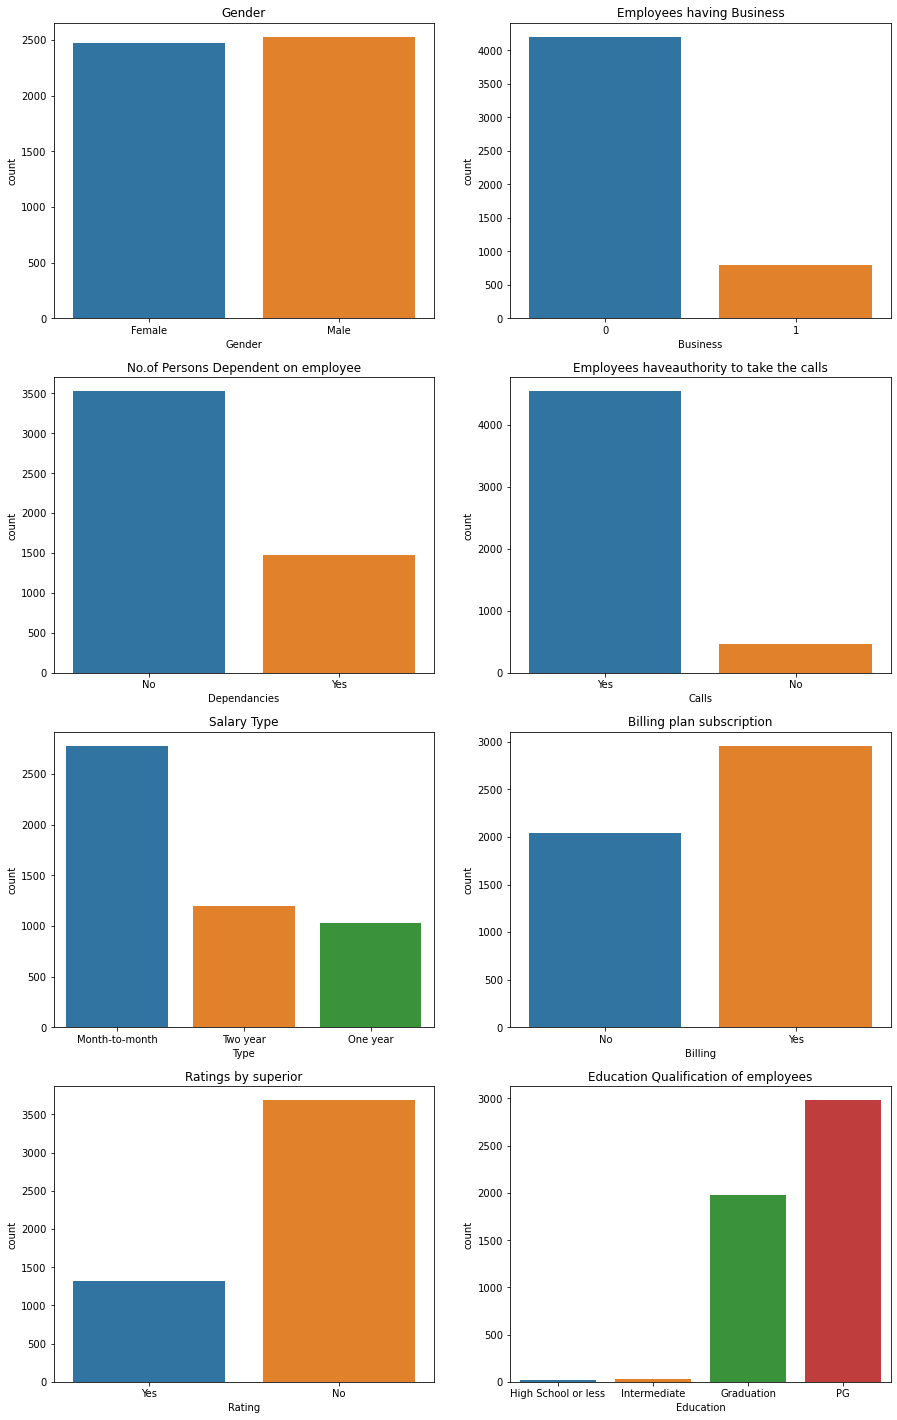

In [27]:
plt.figure(figsize = (15,25))

plt.subplot(4,2,1)

sns.countplot(data = df1, x = "Gender").set(title = "Gender")

plt.subplot(4,2,2)

sns.countplot(data = df1, x = "Business").set(title = "Employees having Business")

plt.subplot(4,2,3)

sns.countplot(data = df1, x = "Dependancies").set(title = "No.of Persons Dependent on employee")

plt.subplot(4,2,4)

sns.countplot(data = df1, x = "Calls").set(title = "Employees haveauthority to take the calls")

plt.subplot(4,2,5)

sns.countplot(data = df1, x = "Type").set(title = "Salary Type")

plt.subplot(4,2,6)

sns.countplot(data = df1, x = "Billing").set(title = "Billing plan subscription")

plt.subplot(4,2,7)

sns.countplot(data = df1, x = "Rating").set(title = "Ratings by superior")

plt.subplot(4,2,8)

sns.countplot(data = df1, x = "Education").set(title = "Education Qualification of employees")

By using countplot here i'm doing the multivariate analysis
1.Gender - Number of male and female employees are almost equal.
2.Business - Most of the employees do not have their own business.
3.Dependents = Most of the employees do not have any dependants.
4.Calls = Most of the employees are authorized to make calls.
5.Type of the Salary = There are three types of salary settlements. Most of the employees get their salary every month.
6.Billings = Most of the employees have subscribed to billing plans.
7.Ratings = Majority of the employees have not received rating by their superiors.
8.Education = Most of the employees are either Post Graduates or Graduates.

# Check the number of variables that are normally distributed & explain

###### Numerical Data

Age

<AxesSubplot:>

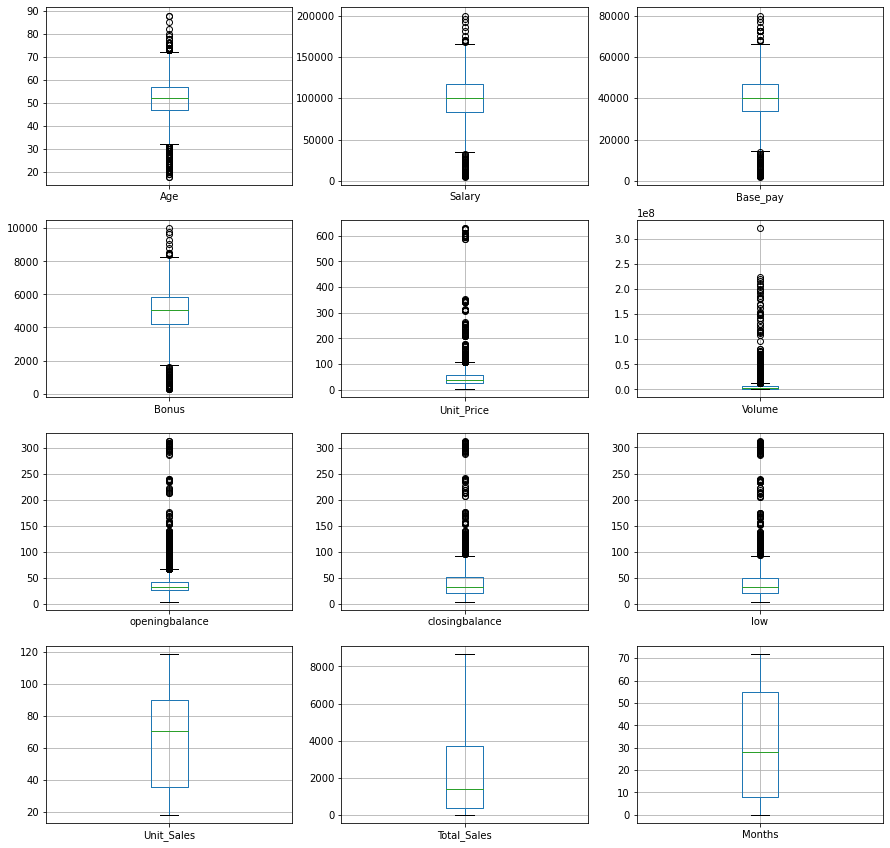

In [28]:
plt.figure(figsize=(15,15)) 

plt.subplot(431)

df1.boxplot('Age')

plt.subplot(432)

df1.boxplot('Salary')

plt.subplot(433)

df1.boxplot("Base_pay")

plt.subplot(434)

df1.boxplot("Bonus")

plt.subplot(435)

df1.boxplot("Unit_Price")

plt.subplot(436)

df1.boxplot("Volume")

plt.subplot(437)

df1.boxplot('openingbalance')

plt.subplot(438)

df1.boxplot('closingbalance')

plt.subplot(439)

df1.boxplot("low")

plt.subplot(4,3,10)

df1.boxplot("Unit_Sales")

plt.subplot(4,3,11)

df1.boxplot("Total_Sales")

plt.subplot(4,3,12)

df1.boxplot("Months")

Age, Salary, Base pay, Bonus, are in normalization
Here i'm numerical univariate anlysis, we can say that except unit sales, Total sales, Months remaning all columns have outliers. so We have to handling the outliers based on their percentages

###### Remove the Outliers in numerical data

Here i'm writing a function to find out the upper whisker, lower whisker, percentage of columns and replace the outliers with their respective whiskers

In [29]:
def outlier_replace(n):
    q1, q3 = n.quantile([0.25, 0.75])
    IQ = q3 - q1
    upper_whisker = q3 + 1.5 * IQ
    lower_whisker = q1 - 1.5 * IQ
    m = len(n[n>upper_whisker])
    n = len(n[n<lower_whisker])
    percent = ((m+n)/len(df1))
    return upper_whisker, lower_whisker, percent

Age

In [30]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["Age"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of Age is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  72.0
The lower whisker is  32.0
The ouliers percentage of Age is  0.023
The outlier percent is less than 0.03, so we don't need to replace the outliers


In [31]:
df1['Age']= np.where(df1['Age']> upp_whisker, upp_whisker, df1['Age'])
df1['Age']= np.where(df1['Age']< low_whisker, low_whisker, df1['Age'])

In [32]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["Salary"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of Salary is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  166444.7227175
The lower whisker is  34357.708737500005
The ouliers percentage of Salary is  0.0154
The outlier percent is less than 0.03, so we don't need to replace the outliers


In [33]:
df1['Salary']= np.where(df1['Salary']> upp_whisker, upp_whisker, df1['Salary'])
df1['Salary']= np.where(df1['Salary']< low_whisker, low_whisker, df1['Salary'])

In [34]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["Base_pay"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of Base_pay is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  66296.0599925
The lower whisker is  14212.79861250001
The ouliers percentage of Base_pay is  0.0166
The outlier percent is less than 0.03, so we don't need to replace the outliers


In [35]:
df1['Base_pay']= np.where(df1['Base_pay']> upp_whisker, upp_whisker, df1['Base_pay'])
df1['Base_pay']= np.where(df1['Base_pay']< low_whisker, low_whisker, df1['Base_pay'])

In [36]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["Bonus"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of Bonus is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  8322.236135124998
The lower whisker is  1717.8854381250007
The ouliers percentage of Bonus is  0.0154
The outlier percent is less than 0.03, so we don't need to replace the outliers


In [37]:
df1['Bonus']= np.where(df1['Bonus']> upp_whisker, upp_whisker, df1['Bonus'])
df1['Bonus']= np.where(df1['Bonus']< low_whisker, low_whisker, df1['Bonus'])

In [38]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["Unit_Price"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of Unit_Price is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  108.196251
The lower whisker is  -23.753751
The ouliers percentage of Unit_Price is  0.0822
The outlier percent is more than 0.03, so we have to replace the outliers


In [39]:
df1['Unit_Price']= np.where(df1['Unit_Price']> upp_whisker, upp_whisker, df1['Unit_Price'])
df1['Unit_Price']= np.where(df1['Unit_Price']< low_whisker, low_whisker, df1['Unit_Price'])

In [40]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["Volume"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of Volume is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  13691975.0
The lower whisker is  -6161025.0
The ouliers percentage of Volume is  0.1
The outlier percent is more than 0.03, so we have to replace the outliers


In [41]:
df1['Volume']= np.where(df1['Volume']> upp_whisker, upp_whisker, df1['Volume'])
df1['Volume']= np.where(df1['Volume']< low_whisker, low_whisker, df1['Volume'])

In [42]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["openingbalance"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of openingbalance is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  66.71605129000002
The lower whisker is  2.206581849999985
The ouliers percentage of openingbalance is  0.106
The outlier percent is more than 0.03, so we have to replace the outliers


In [43]:
df1['openingbalance']= np.where(df1['openingbalance']> upp_whisker, upp_whisker, df1['openingbalance'])
df1['openingbalance']= np.where(df1['openingbalance']< low_whisker, low_whisker, df1['openingbalance'])

In [44]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["closingbalance"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of closingbalance is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  94.80875125
The lower whisker is  -21.701250750000003
The ouliers percentage of closingbalance is  0.0794
The outlier percent is more than 0.03, so we have to replace the outliers


In [45]:
df1['closingbalance']= np.where(df1['closingbalance']> upp_whisker, upp_whisker, df1['closingbalance'])
df1['closingbalance']= np.where(df1['closingbalance']< low_whisker, low_whisker, df1['closingbalance'])

In [46]:
upp_whisker, low_whisker, percentage_of_outliers = outlier_replace(df1["low"])
print("The upper whisker is ", upp_whisker)
print("The lower whisker is ", low_whisker)
print("The ouliers percentage of low is ", percentage_of_outliers)
if percentage_of_outliers > 0.03:
    print("The outlier percent is more than 0.03, so we have to replace the outliers")
else:
    print("The outlier percent is less than 0.03, so we don't need to replace the outliers")

The upper whisker is  93.45937546875
The lower whisker is  -21.325625781249997
The ouliers percentage of low is  0.0792
The outlier percent is more than 0.03, so we have to replace the outliers


In [47]:
df1['low']= np.where(df1['low']> upp_whisker, upp_whisker, df1['low'])
df1['low']= np.where(df1['low']< low_whisker, low_whisker, df1['low'])

<AxesSubplot:>

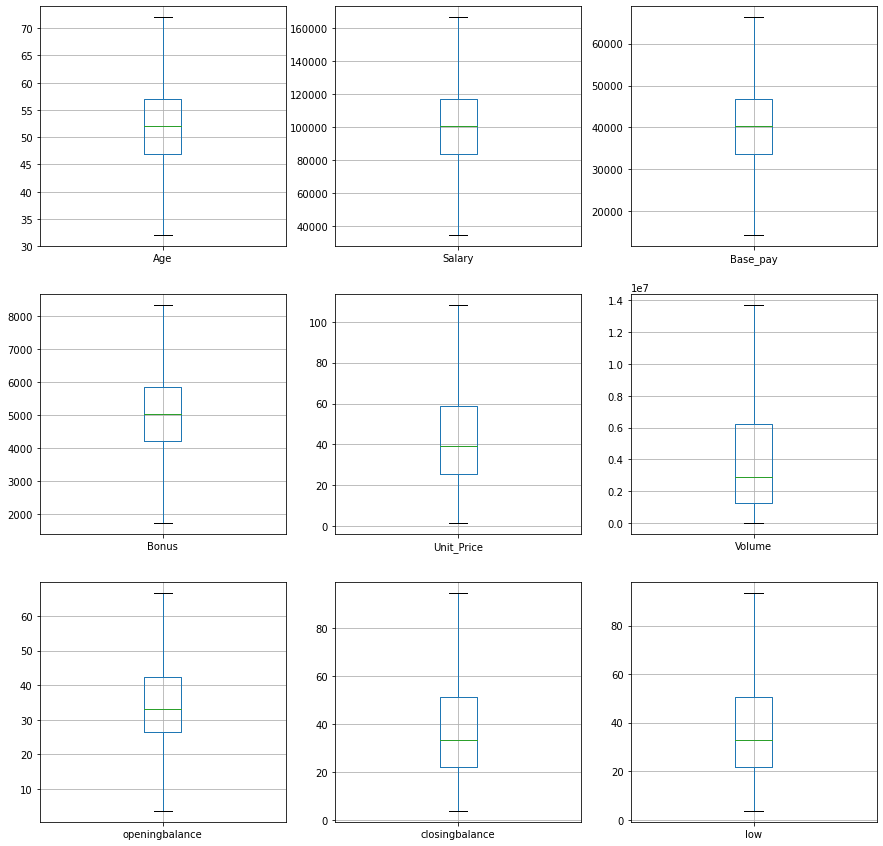

In [48]:
plt.figure(figsize=(15,15)) 

plt.subplot(331)

df1.boxplot('Age')

plt.subplot(332)

df1.boxplot('Salary')

plt.subplot(333)

df1.boxplot("Base_pay")

plt.subplot(334)

df1.boxplot("Bonus")

plt.subplot(335)

df1.boxplot("Unit_Price")

plt.subplot(336)

df1.boxplot("Volume")

plt.subplot(337)

df1.boxplot('openingbalance')

plt.subplot(338)

df1.boxplot('closingbalance')

plt.subplot(339)

df1.boxplot("low")

Here we can say that there is no outliers of each every field of data set for replacing

# Bivariate Analysis

# Find out the correlation between variables using spearman rank correlation & explain

In [49]:
df1.corr(method = 'spearman')# Here i find out the relationship between two numerical variables by using spearman correlation

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Business,1.000000,-0.008466,-0.018371,-0.019239,-0.018371,-0.019727,-0.002400,0.005442,-0.007514,-0.018293,-0.018363,-0.019652,-0.012282
Age,-0.008466,1.000000,0.202262,0.192910,0.202262,0.126213,-0.039215,0.076532,0.439819,0.198815,0.202256,0.195895,0.222820
Salary,-0.018371,0.202262,1.000000,0.994006,1.000000,0.811401,-0.390505,0.171840,0.346207,0.999614,0.999996,0.995929,0.603794
Base_pay,-0.019239,0.192910,0.994006,1.000000,0.994006,0.807997,-0.389893,0.162845,0.339539,0.993616,0.994001,0.989942,0.597306
Bonus,-0.018371,0.202262,1.000000,0.994006,1.000000,0.811401,-0.390505,0.171840,0.346207,0.999614,0.999996,0.995929,0.603794
Unit_Price,-0.019727,0.126213,0.811401,0.807997,0.811401,1.000000,-0.326443,0.096087,0.262548,0.812202,0.811475,0.807871,0.550448
Volume,-0.002400,-0.039215,-0.390505,-0.389893,-0.390505,-0.326443,1.000000,-0.008825,-0.146499,-0.394198,-0.390567,-0.390661,-0.261445
openingbalance,0.005442,0.076532,0.171840,0.162845,0.171840,0.096087,-0.008825,1.000000,0.252230,0.171841,0.171851,0.170440,-0.053807
closingbalance,-0.007514,0.439819,0.346207,0.339539,0.346207,0.262548,-0.146499,0.252230,1.000000,0.344131,0.346207,0.341612,0.365752
low,-0.018293,0.198815,0.999614,0.993616,0.999614,0.812202,-0.394198,0.171841,0.344131,1.000000,0.999612,0.995904,0.603324


<AxesSubplot:>

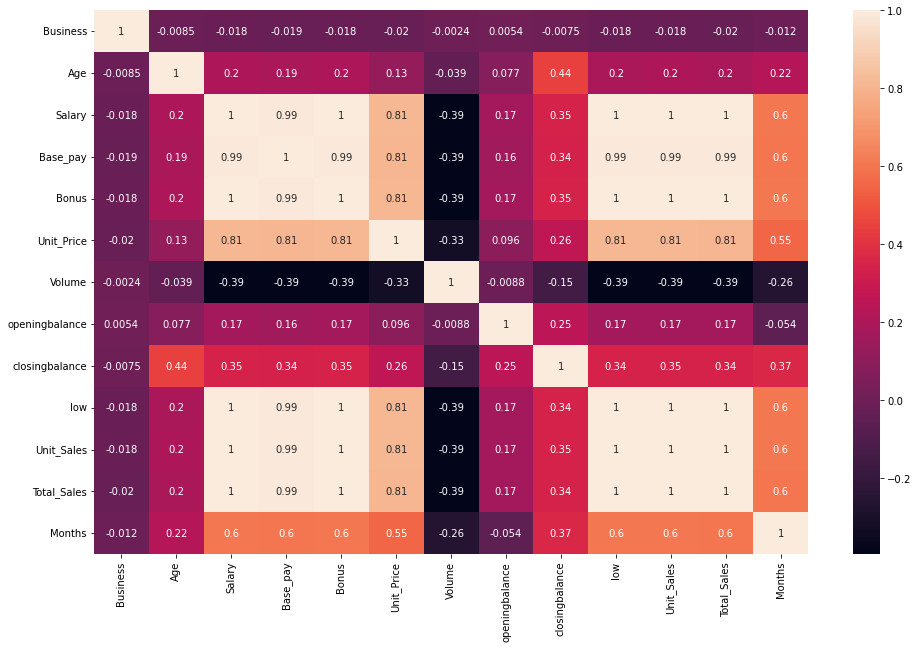

In [50]:
plt.figure(figsize=(16,10)) # Heat map which shows the relationship numerical variables
sns.heatmap(df1.corr(method = 'spearman'), annot = True)

# Examine the relationship between categorical variables and the dependent variable & explain

<AxesSubplot:xlabel='Months', ylabel='Salary'>

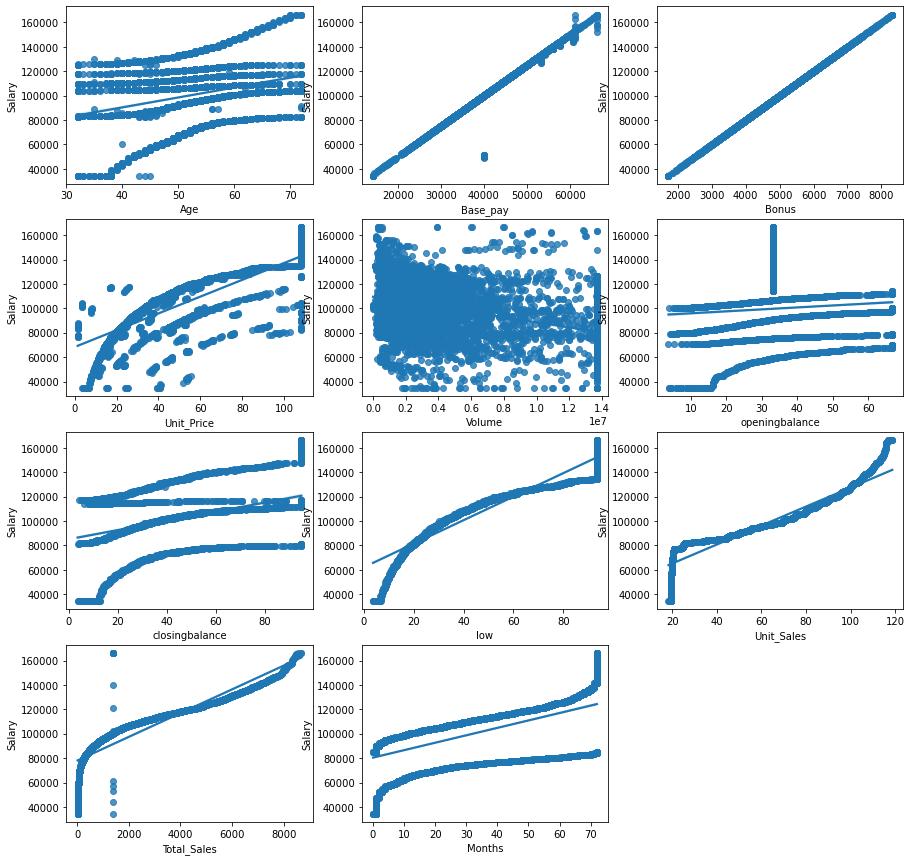

In [51]:
plt.figure(figsize=(15,15)) 

plt.subplot(431)

sns.regplot(data = df1, x = 'Age', y = "Salary")

plt.subplot(432)

sns.regplot(data = df1, x = "Base_pay", y = "Salary")

plt.subplot(433)

sns.regplot(data = df1, x = "Bonus", y = "Salary")

plt.subplot(434)

sns.regplot(data = df1, x = "Unit_Price", y = "Salary")

plt.subplot(435)

sns.regplot(data = df1, x = "Volume", y = "Salary")

plt.subplot(436)

sns.regplot(data = df1, x = 'openingbalance', y = "Salary")

plt.subplot(437)

sns.regplot(data = df1, x ='closingbalance', y = "Salary")

plt.subplot(438)

sns.regplot(data = df1, x = "low", y = "Salary")

plt.subplot(4,3,9)

sns.regplot(data = df1, x = "Unit_Sales", y = "Salary")

plt.subplot(4,3,10)

sns.regplot(data = df1, x = "Total_Sales", y = "Salary")

plt.subplot(4,3,11)

sns.regplot(data = df1, x = "Months", y = "Salary")

From the Heat Maps and replot, we can see that Base pay and Bonus have a perfect positive correlation with Salary.
Unit sales, Total sales, Low, Months, Unit price have a high positive correlation (>0.8) with Salary.
Education, Age and Closing balance have a moderate positive correlation (>0.5) with Salary.
Opening balance has a low positive correlation (0.41) with Salary
Business, Dependents, Type, Billing, Rating, Gender, Calls and Volume have no correlation (0 to 0.1) with Salary.

###### Relationship between Categorical data and Dependent Variable(Salary)

[Text(0.5, 1.0, 'Salary vs Salary Type')]

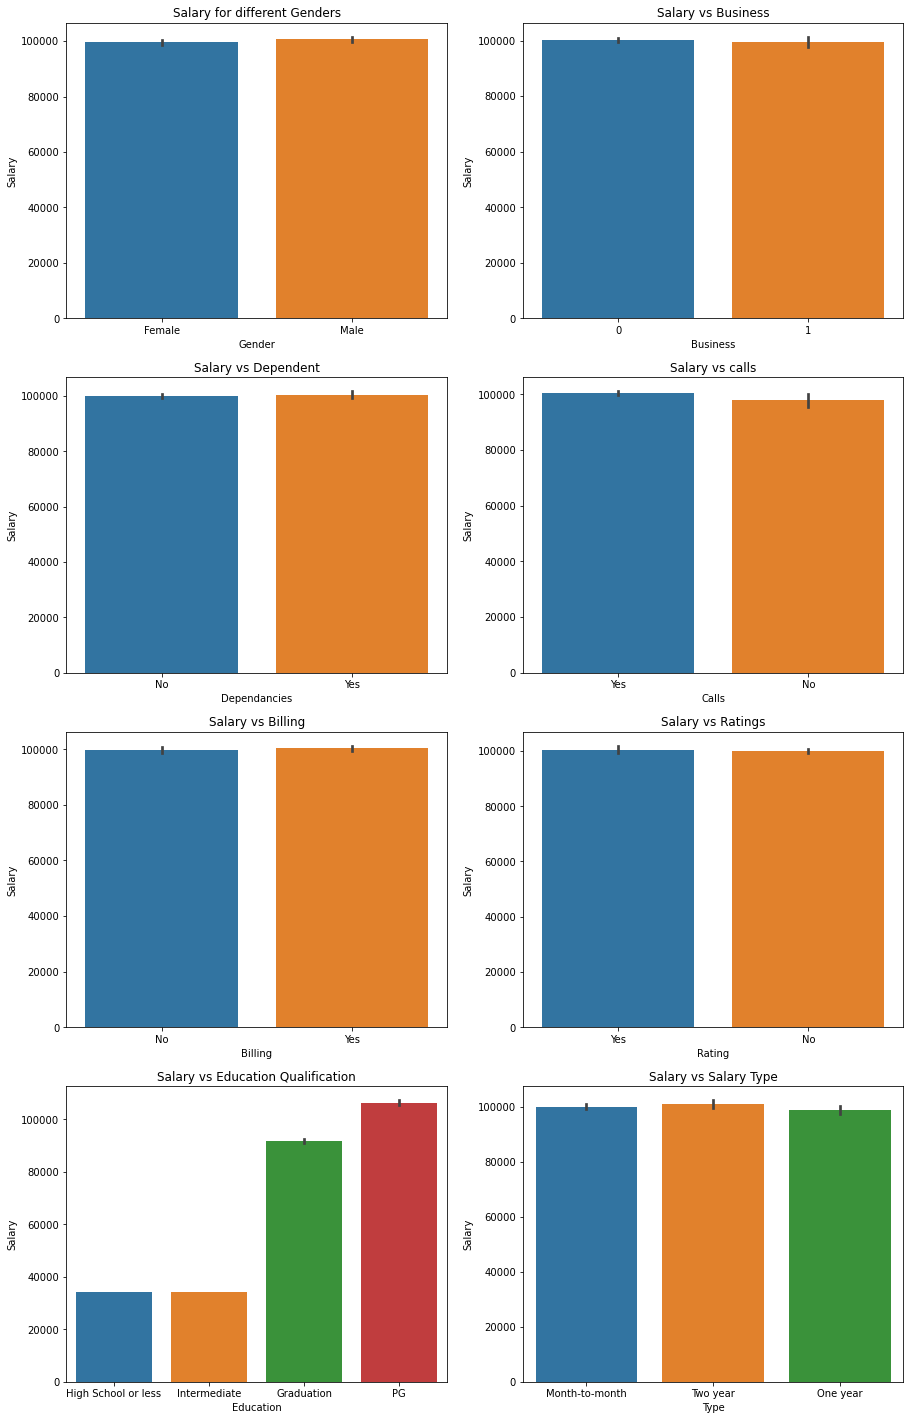

In [52]:
plt.figure(figsize = (15,25))

plt.subplot(4,2,1)

sns.barplot(data = df1, x = "Gender", y = "Salary").set(title = "Salary for different Genders")

plt.subplot(4,2,2)

sns.barplot(data = df1, x = "Business", y = "Salary").set(title = "Salary vs Business")

plt.subplot(4,2,3)

sns.barplot(data = df1, x = "Dependancies", y = "Salary").set(title = "Salary vs Dependent")

plt.subplot(4,2,4)

sns.barplot(data = df1, x = "Calls", y = "Salary").set(title = "Salary vs calls")

plt.subplot(4,2,5)

sns.barplot(data = df1, x = "Billing", y = "Salary").set(title = "Salary vs Billing")

plt.subplot(4,2,6)

sns.barplot(data = df1, x = "Rating", y = "Salary").set(title = "Salary vs Ratings")

plt.subplot(4,2,7)

sns.barplot(data = df1, x = "Education", y = "Salary").set(title = "Salary vs Education Qualification")

plt.subplot(4,2,8)

sns.barplot(data = df1, x = "Type", y = "Salary").set(title = "Salary vs Salary Type")

In the above plots there is no affect on salary while compairing with different categorical data but except education column. Because the salary which is depends on education qualification

### Dependent Data

In [53]:
y= df1['Salary'] # According to our project, Salary is the dependent variable 

### Independent Data

In [54]:
# By absorbing the univariate, bivariate, multivariate analysis following these columns are independent columns
X = df1[['Base_pay','Bonus','Unit_Sales','Total_Sales','low','Months','Unit_Price','Education']]
X.head()

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,Education
0,14212.798613,1717.885438,18.25,18.80,3.65,0,3.77,High School or less
1,14212.798613,1717.885438,18.40,18.85,3.65,0,3.74,High School or less
2,14212.798613,1717.885438,18.70,18.90,3.72,0,3.89,High School or less
3,14212.798613,1717.885438,18.75,19.00,3.83,0,4.35,High School or less
4,14212.798613,1717.885438,18.80,19.05,4.08,1,4.34,High School or less


# Apply ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable for the same & explain

By using sklearn library here we are converting the numerical data into normalization for ml procedeure, beacause the data which is in different scales

In [55]:
from sklearn.preprocessing import StandardScaler # For normalization here standard scaler import from the sklearn
std_scale = StandardScaler()

In [56]:
X['Bonus'] = std_scale.fit_transform(X[['Bonus']])
X['Base_pay'] = std_scale.fit_transform(X[['Base_pay']])
X['Unit_Sales'] = std_scale.fit_transform(X[['Unit_Sales']])
X['Total_Sales'] = std_scale.fit_transform(X[['Total_Sales']])
X['low'] = std_scale.fit_transform(X[['low']])
X['Months'] = std_scale.fit_transform(X[['Months']])
X['Unit_Price'] = std_scale.fit_transform(X[['Unit_Price']])

In [57]:
X.head() # Thse are the first five records after normalization

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,Education
0,-2.676266,-2.689645,-1.546007,-0.993980,-1.500042,-1.306505,-1.541890,High School or less
1,-2.676266,-2.689645,-1.541030,-0.993958,-1.500042,-1.306505,-1.542981,High School or less
2,-2.676266,-2.689645,-1.531075,-0.993936,-1.497098,-1.306505,-1.537525,High School or less
3,-2.676266,-2.689645,-1.529416,-0.993892,-1.492471,-1.306505,-1.520791,High School or less
4,-2.676266,-2.689645,-1.527757,-0.993869,-1.481955,-1.265911,-1.521154,High School or less


Encode the Categorical variables

In [58]:
k = pd.get_dummies(data = X["Education"],  drop_first=True)
k

,High School or less,Intermediate,PG
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4995,0,0,1
4996,0,0,1
4997,0,0,1
4998,0,0,1


In [59]:
X= pd.concat([X, k],axis=1) # Conacate the numerical and categorical data which those are required for ml alogarithm
X.drop('Education', axis= 1, inplace= True)

In [60]:
X

,Base_pay,Bonus,Unit_Sales,Total_Sales,low,Months,Unit_Price,High School or less,Intermediate,PG
0,-2.676266,-2.689645,-1.546007,-0.993980,-1.500042,-1.306505,-1.541890,1,0,0
1,-2.676266,-2.689645,-1.541030,-0.993958,-1.500042,-1.306505,-1.542981,1,0,0
2,-2.676266,-2.689645,-1.531075,-0.993936,-1.497098,-1.306505,-1.537525,1,0,0
3,-2.676266,-2.689645,-1.529416,-0.993892,-1.492471,-1.306505,-1.520791,1,0,0
4,-2.676266,-2.689645,-1.527757,-0.993869,-1.481955,-1.265911,-1.521154,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,2.699499,2.717005,1.757278,-0.385938,2.277759,1.616253,2.256978,0,0,1
4996,2.699499,2.717005,1.783823,-0.385938,2.277759,1.616253,2.256978,0,0,1
4997,2.699499,2.717005,1.783823,-0.385938,2.277759,1.616253,2.256978,0,0,1
4998,2.699499,2.717005,1.785483,-0.385938,2.277759,1.616253,2.256978,0,0,1


Variance inflation factor which is one of the function to find out the multicollinearity in the inedependent variables
VIF = 1 No multicollinearity
2 <= VIF <= 5 moderate multicollinearity
VIF  > 5 It's severe multicollineraity

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import the VIF function from stats library

In [62]:
def calc_vif(x):# defining function calc_vif(x)

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [63]:
calcx=calc_vif(X) # assiging the vif value to calcx  
calcx

,variables,VIF
0,Base_pay,53.420609
1,Bonus,70.403605
2,Unit_Sales,24.077892
3,Total_Sales,32.366138
4,low,47.578700
5,Months,3.231838
6,Unit_Price,3.705005
7,High School or less,1.112948
8,Intermediate,1.220805
9,PG,1.069034


In [ ]:
Except last five columns remaining all are greater than 5, so have to remove those columns from the data set X

In [64]:
X.drop(["Base_pay", "Bonus", "Unit_Sales", "Total_Sales", "low"], axis = 1, inplace = True)

In [65]:
X

,Months,Unit_Price,High School or less,Intermediate,PG
0,-1.306505,-1.541890,1,0,0
1,-1.306505,-1.542981,1,0,0
2,-1.306505,-1.537525,1,0,0
3,-1.306505,-1.520791,1,0,0
4,-1.265911,-1.521154,1,0,0
...,...,...,...,...,...
4995,1.616253,2.256978,0,0,1
4996,1.616253,2.256978,0,0,1
4997,1.616253,2.256978,0,0,1
4998,1.616253,2.256978,0,0,1


# Build the Machine Learning Model

In [66]:
from sklearn.model_selection import train_test_split 
# Here i'm spliting the data into train and test data set with 80% and 20 % respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Linear Regression Model

In [67]:
# Import the linear regression model from the sklearn module
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)# Here i'm applying the data to build the model of ml

LinearRegression()

In [68]:
y_train_predict = linear_regression.predict(X_train)
rsme = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_true= y_train, y_pred = y_train_predict)

print("The model performance for training set : ")
print("\t", end = " ")
print('Root Mean Square Error is {}'.format(rsme))
print("\t", end = " ")
print('R2 score is {}'.format(r2))

The model performance for training set : 
	 Root Mean Square Error is 14410.025563016585
	 R2 score is 0.6556215945108277


In [69]:
y_test_predict = linear_regression.predict(X_test)
rsme = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_true= y_test, y_pred = y_test_predict)

print("The model performance for testing set : ")
print("\t", end = " ")
print('Root Mean Square Error is {}'.format(rsme))
print("\t", end = " ")
print('R2 score is {}'.format(r2))

The model performance for testing set : 
	 Root Mean Square Error is 14067.590813734405
	 R2 score is 0.6542407583850472


The low RMSE value and perfect R squared value for both the training and testing data suggests a good prediction model.

In [77]:
# Linear model is not a best model for the data, so we have to check the data with the other ml models also

# Decison Tree

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [71]:
from sklearn.tree import DecisionTreeRegressor # Import the decision tree regressor from sklearn library
Decision_Tree = DecisionTreeRegressor(max_depth=3)
Decision_Tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [72]:
print(Decision_Tree.score(X_train, y_train)) # Here we find out the score of train and test data set scores 
print(Decision_Tree.score(X_test, y_test))

0.9568087449813447
0.9452168954927723


We can see that both the Training and Testing score have a very good DTR score approximately 95%

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor # Import the Random Forest from sklearn library
RF=RandomForestRegressor()
RF.fit(X_train,y_train.ravel())

RandomForestRegressor()

In [74]:
print(RF.score(X_train,y_train))# Here we find out the score of train and test data set scores 
print(RF.score(X_test,y_test))

0.9859686721575249
0.9798420832757252


We can see that both the Training and Testing score have a very good RF score approximately 98%

So we can say that Random Forest model is the best model among the remaining all models